<a href="https://colab.research.google.com/github/ramtiin/Predicting-YouTube-Dislikes-using-Machine-Learning/blob/main/Predicting_YouTube_Dislikes_via_Catboost_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Downloading the dataset:**

For downloading datasets from Kaggle, you will need an API key.

To find your API credentials, follow these steps:

1.   After signing in to https://kaggle.com/, select "My Account" from the menu on the top right. 
2.   Click "Create New API Token" under the "API" section. This will download a file kaggle.json.

Then upload kaggle.json file to this notebook and run the following codes:


In [2]:
! pip install -q kaggle

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list

! kaggle datasets download -d dmitrynikolaev/youtube-dislikes-dataset

 83% 49.0M/58.8M [00:01<00:00, 44.6MB/s]
100% 58.8M/58.8M [00:01<00:00, 36.9MB/s]


In [3]:
! unzip youtube-dislikes-dataset.zip

Archive:  youtube-dislikes-dataset.zip
  inflating: video_IDs/unique_ids_CA.txt  
  inflating: video_IDs/unique_ids_GB.txt  
  inflating: video_IDs/unique_ids_GB_CA_US.txt  
  inflating: video_IDs/unique_ids_US.txt  
  inflating: video_IDs/unique_ids_from_kaggle.txt  
  inflating: youtube_dislike_dataset.csv  


In [4]:
df = pd.read_csv("youtube_dislike_dataset.csv")

In [5]:
df


,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...
...,...,...,...,...,...,...,...,...,...,...,...,...
37417,zzd4ydafGR0,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,2021-02-12 05:03:49,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! https://liltjay.ln...
37418,zziBybeSAtw,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,2021-01-16 05:39:05,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,zzk09ESX7e0,[MV] (MAMAMOO) - Where Are We Now,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,2021-06-02 09:00:10,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now...,[MV] (MAMAMOO) - Where Are We Now\n\nInstagra...,I honestly do not know why this song hit so ha...
37420,zzmQEb0Em5I,FELLIPE ESCUDERO- Master Podcast #12,UC8NjnNWMsRqq11NYvHAQb1g,Master Podcast,2020-10-20 20:59:30,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR\nhttps://www.thedoctorhair.com/?fb...,Foi um prazer passar esta tarde com vocs debat...


**Installing necessary packages:**

In [6]:
!pip install --upgrade vaderSentiment
!pip install texthero
!pip install catboost
!pip install shap

     |████████████████████████████████| 125 kB 11.8 MB/s 
     |████████████████████████████████| 1.5 MB 17.6 MB/s 
     |████████████████████████████████| 235 kB 12.8 MB/s 
     |████████████████████████████████| 749 kB 39.1 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 76.1 MB 55 kB/s 
     |████████████████████████████████| 564 kB 11.7 MB/s 


**Cleaning texts:**

In [7]:
import texthero as hero
from texthero import preprocessing

df_new = df.drop(['video_id','published_at','channel_id','channel_title'],axis=1)

custom_pipeline = [preprocessing.fillna,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_urls,
                   ]

df_new['description'] = df_new['description'].pipe(hero.clean, custom_pipeline)
df_new['comments'] = df_new['comments'].pipe(hero.clean, custom_pipeline)
df_new['tags'] = df_new['tags'].pipe(hero.clean, custom_pipeline)
df_new

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,view_count,likes,dislikes,comment_count,tags,description,comments
0,Jadon Sancho Magical Skills & Goals,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,Migos - Avalanche (Official Video),15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,Supporting Actress in a Comedy: 73rd Emmys,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STARGAZER PROTOSTA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO ------...,youngVer>< REN is really PERFECT. It's not jus...
4,Why Retaining Walls Collapse,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: Get some ...
...,...,...,...,...,...,...,...,...
37417,Lil Tjay - Calling My Phone (feat. 6LACK) [Off...,120408275,2180780,35871,81360,Lil Tjay Steady Calling My Phone Calling My Ph...,"Official video for ""Calling My Phone"" by Lil T...",'DESTINED 2 WIN' OUT NOW !! What a song will...
37418,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,2841917,20759,1049,2624,NBA G League Basketball game-0022000187 Lakers...,PELICANS at LAKERS | FULL GAME HIGHLIGHTS | Ja...,Montrezl Harrell is going crazy with the rebou...
37419,[MV] (MAMAMOO) - Where Are We Now,13346678,720854,4426,90616,MAMAMOO WAW WAW MAMAMOO WAW Where Are We Now W...,[MV] (MAMAMOO) - Where Are We Now Instagram: ...,I honestly do not know why this song hit so ha...
37420,FELLIPE ESCUDERO- Master Podcast #12,252057,19198,1234,1471,master masterpodcast lord lord vinheteiro z z ...,DOCTOR HAIR FOCO MUSICAL --------- COR...,Foi um prazer passar esta tarde com vocs debat...


**Sentiment Analysis using VADER:**

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
description_analysis = df_new['description'].apply(analyzer.polarity_scores).apply(pd.Series)

In [10]:
comments_analysis = df_new['comments'].apply(analyzer.polarity_scores).apply(pd.Series)

In [11]:
tags_analysis = df_new['tags'].apply(analyzer.polarity_scores).apply(pd.Series)

In [12]:
description_analysis.rename(columns={"neg": "des_neg", "neu": "des_neu", "pos": "des_pos", "compound": "des_compound"},inplace=True)
comments_analysis.rename(columns={"neg": "com_neg", "neu": "com_neu", "pos": "com_pos", "compound": "com_compound"},inplace=True)
tags_analysis.rename(columns={"neg": "tag_neg", "neu": "tag_neu", "pos": "tag_pos", "compound": "tag_compound"},inplace=True)

sentiment_df = pd.concat([description_analysis,comments_analysis,tags_analysis],axis=1)

**Merging data:**

In [13]:
cleaned_df = pd.concat([df_new,sentiment_df],axis=1).drop(["comments","description","tags","title"],axis=1)

In [14]:
cleaned_df.columns

Index(['view_count', 'likes', 'dislikes', 'comment_count', 'des_neg',
       'des_neu', 'des_pos', 'des_compound', 'com_neg', 'com_neu', 'com_pos',
       'com_compound', 'tag_neg', 'tag_neu', 'tag_pos', 'tag_compound'],
      dtype='object')

**Specify input variables (X) and an output variable (y):**

In [15]:
X = cleaned_df.drop(['dislikes'],axis=1)
y = cleaned_df['dislikes']

**Traning and testing our model by K-fold cross-validation method:**

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

folds = 5

regressor = CatBoostRegressor(silent=True)

pipeline = Pipeline([ ('estimator', regressor)])

cv = KFold(n_splits=folds)
scores = cross_val_score(pipeline, X, y,cv = cv , scoring='neg_mean_absolute_error')

# Results:

In [17]:
scores

array([-2564.08636614, -2909.00865281, -2931.26289486, -2944.04111978,
       -2701.01887863])

In [18]:
scores.mean()

-2809.8835824427333

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
cat_regressor = CatBoostRegressor(silent=True)
cat_regressor.fit(X_train,y_train)

**The impact of each feature on the model output:**

*For having a cleaner plot, we remove outliers using Z-scores.*

In [21]:
import scipy.stats as stats
z_scores = stats.zscore(X_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 1).all(axis=1)
new_X = X_train[filtered_entries]

In [22]:
import shap
explainer = shap.TreeExplainer(cat_regressor)
shap_values = explainer.shap_values(new_X)

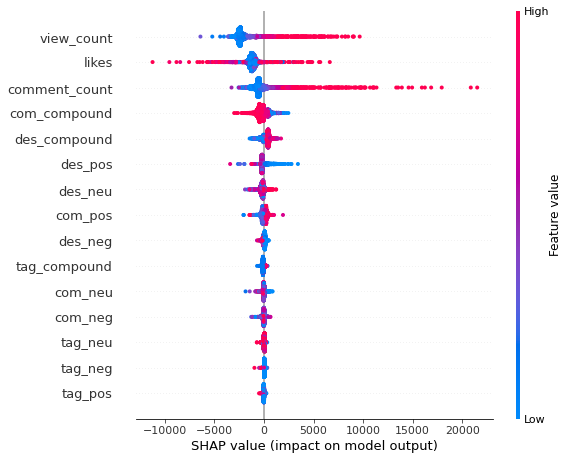

In [23]:
shap.summary_plot(shap_values, new_X)

**The relationship between MAE and video dislike quantity:**

In [24]:
from sklearn.metrics import mean_absolute_error
errors = []
ys = []
for i in range (np.min(y_test)+1,np.max(y_test),1000):
  ys.append(i)
  slected_y_test = y_test[y_test<i]
  slected_x_test = X_test[y_test<i]
# Predicting the Test set results
  y_pred = cat_regressor.predict(slected_x_test)
  np.set_printoptions(precision=2)
  errors.append(mean_absolute_error(slected_y_test, y_pred))

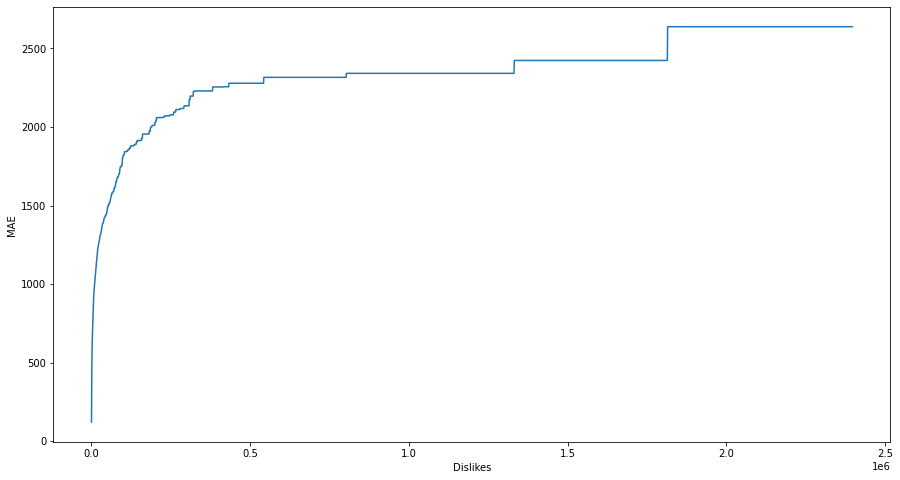

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(ys ,errors)
plt.xlabel("Dislikes")
plt.ylabel("MAE")
plt.show()

**The relationship between MAE and video views quantity:**

In [26]:
from sklearn.metrics import mean_absolute_error
errors = []
ys = []
for i in range (np.min(X_test['view_count'])+1,np.max(X_test['view_count']),100000):
  ys.append(i)
  selected_y_test = y_test[X_test['view_count']<i]
  selected_x_test = X_test[X_test['view_count']<i]
# Predicting the Test set results
  y_pred = cat_regressor.predict(selected_x_test)
  np.set_printoptions(precision=2)
  errors.append(mean_absolute_error(selected_y_test, y_pred))

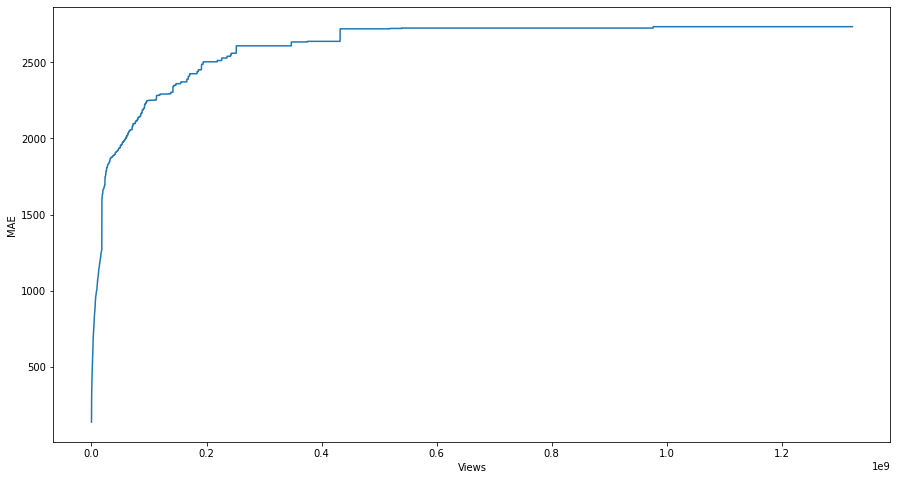

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
plt.plot(ys ,errors)
plt.xlabel("Views")
plt.ylabel("MAE")
plt.show()